#### Classification Iris dataset

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
%config InlineBackend.figure_format='retina'

In [2]:
df=pd.read_csv('https://raw.githubusercontent.com/prasertcbs/basic-dataset/master/iris.csv')
df.sample(10)

,sepal_length,sepal_width,petal_length,petal_width,species
90,5.5,2.6,4.4,1.2,versicolor
101,5.8,2.7,5.1,1.9,virginica
1,4.9,3.0,1.4,0.2,setosa
131,7.9,3.8,6.4,2.0,virginica
106,4.9,2.5,4.5,1.7,virginica
139,6.9,3.1,5.4,2.1,virginica
88,5.6,3.0,4.1,1.3,versicolor
19,5.1,3.8,1.5,0.3,setosa
119,6.0,2.2,5.0,1.5,virginica
121,5.6,2.8,4.9,2.0,virginica


In [3]:
df.species.value_counts()

species
setosa        50
versicolor    50
virginica     50
Name: count, dtype: int64

In [5]:
df.columns

Index(['sepal_length', 'sepal_width', 'petal_length', 'petal_width',
       'species'],
      dtype='object')

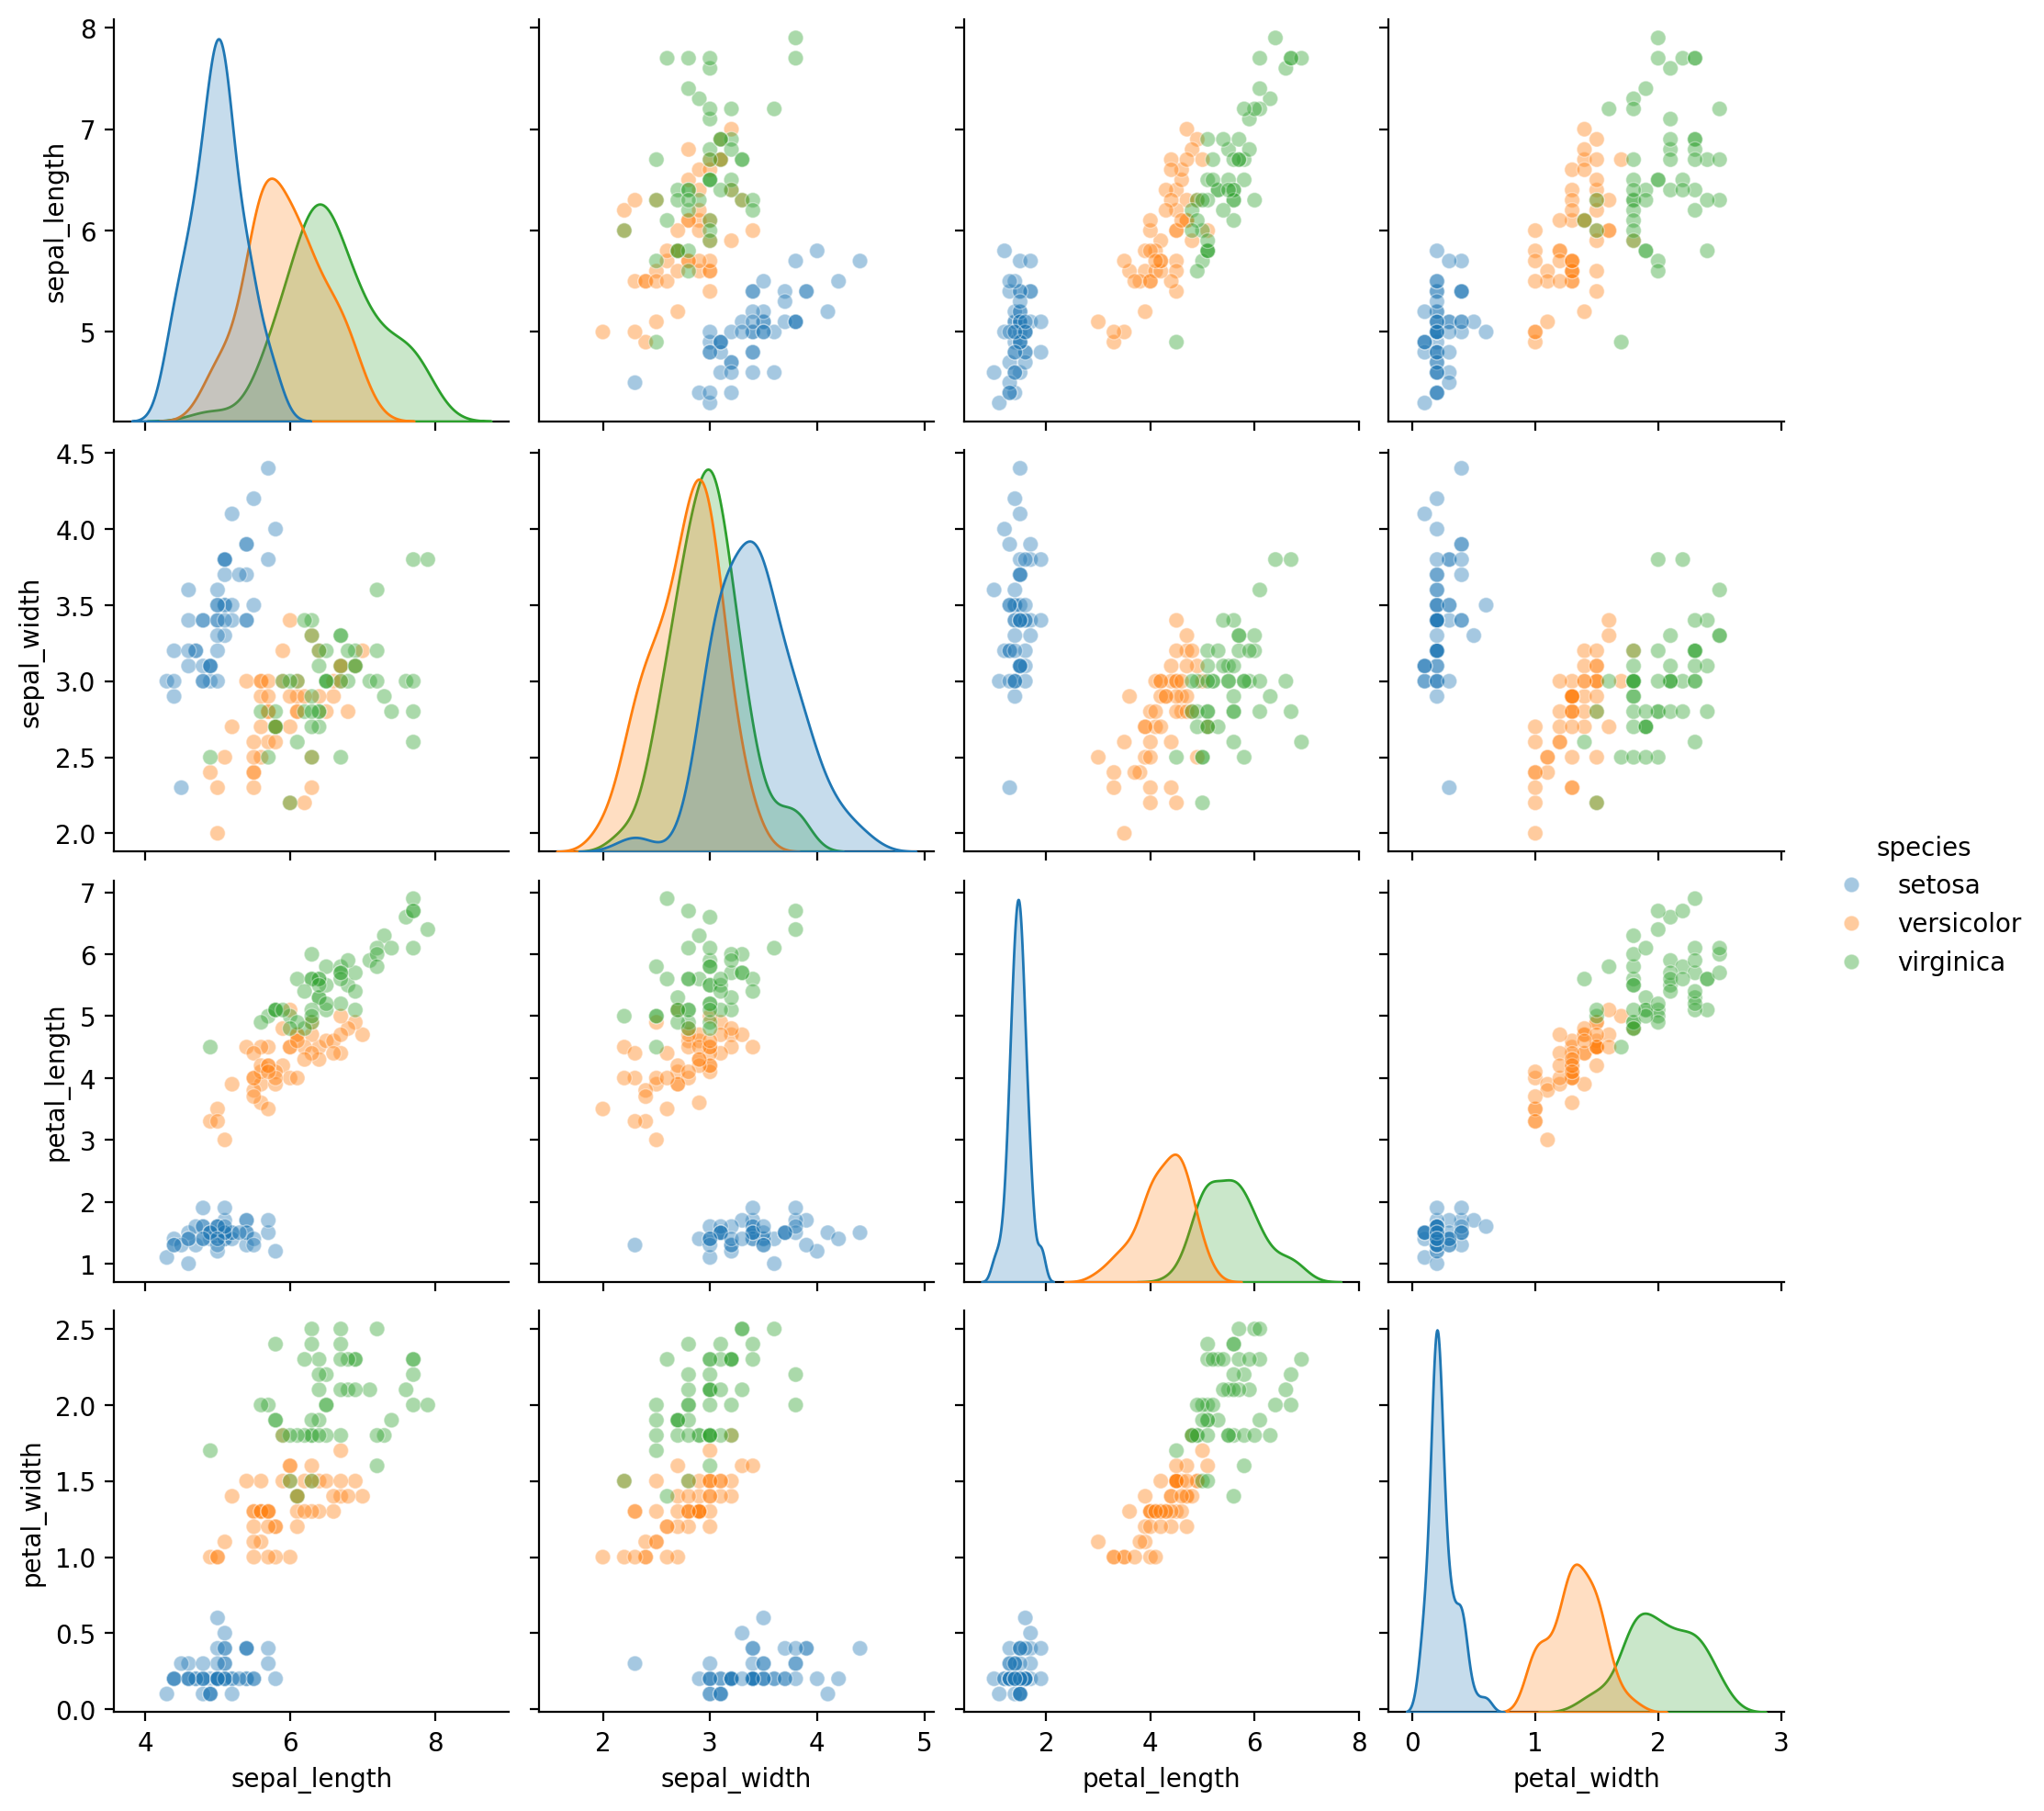

In [12]:
sns.pairplot(df, vars=['sepal_length', 'sepal_width', 'petal_length', 'petal_width'],
            hue='species',
            markers='o',
            plot_kws={'alpha': .4})

In [13]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 5 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   sepal_length  150 non-null    float64
 1   sepal_width   150 non-null    float64
 2   petal_length  150 non-null    float64
 3   petal_width   150 non-null    float64
 4   species       150 non-null    object 
dtypes: float64(4), object(1)
memory usage: 6.0+ KB


#### sklearn: KNeighborsClassifier

In [14]:
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import LogisticRegression

In [15]:
df.columns

Index(['sepal_length', 'sepal_width', 'petal_length', 'petal_width',
       'species'],
      dtype='object')

In [26]:
# use all data for training
# X_train = df[['sepal_length', 'sepal_width', 'petal_length', 'petal_width',
#        'species']]
# y_train = df.species
# y_train = df.species_code

test_size = 0.1
X_train, X_test, y_train, y_test = train_test_split(
    df[['sepal_length', 'sepal_width', 'petal_length', 'petal_width']],
    df.species,
    test_size=test_size, random_state=7
)

In [27]:
X_train.head()

,sepal_length,sepal_width,petal_length,petal_width
70,5.9,3.2,4.8,1.8
108,6.7,2.5,5.8,1.8
137,6.4,3.1,5.5,1.8
46,5.1,3.8,1.6,0.2
37,4.9,3.1,1.5,0.1


In [28]:
y_train

70     versicolor
108     virginica
137     virginica
46         setosa
37         setosa
          ...    
142     virginica
92     versicolor
103     virginica
67     versicolor
25         setosa
Name: species, Length: 135, dtype: object

In [29]:
model = KNeighborsClassifier()
model

KNeighborsClassifier()

In [30]:
model.fit(X_train, y_train)

KNeighborsClassifier()

In [31]:
model.score(X_train, y_train)

0.9703703703703703

In [32]:
df.sample(10)

,sepal_length,sepal_width,petal_length,petal_width,species
4,5.0,3.6,1.4,0.2,setosa
101,5.8,2.7,5.1,1.9,virginica
77,6.7,3.0,5.0,1.7,versicolor
39,5.1,3.4,1.5,0.2,setosa
69,5.6,2.5,3.9,1.1,versicolor
20,5.4,3.4,1.7,0.2,setosa
129,7.2,3.0,5.8,1.6,virginica
70,5.9,3.2,4.8,1.8,versicolor
92,5.8,2.6,4.0,1.2,versicolor
15,5.7,4.4,1.5,0.4,setosa


In [34]:
model.predict(
    [[3,4,5,6],
    [3,4,5,2],
    [5,3.5,1.5,.2]]
)

c:\Users\1000259375\Desktop\DE Project\PythonMLBasic\env\lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but KNeighborsClassifier was fitted with feature names
  warnings.warn(


array(['virginica', 'versicolor', 'setosa'], dtype=object)

In [37]:
from sklearn import metrics

In [40]:
predicted = model.predict(X_train)
predicted

array(['virginica', 'virginica', 'virginica', 'setosa', 'setosa',
       'versicolor', 'virginica', 'versicolor', 'versicolor', 'virginica',
       'virginica', 'versicolor', 'versicolor', 'virginica', 'virginica',
       'virginica', 'versicolor', 'setosa', 'virginica', 'versicolor',
       'setosa', 'setosa', 'setosa', 'setosa', 'virginica', 'virginica',
       'versicolor', 'virginica', 'virginica', 'versicolor', 'setosa',
       'versicolor', 'versicolor', 'virginica', 'setosa', 'setosa',
       'setosa', 'virginica', 'setosa', 'virginica', 'versicolor',
       'versicolor', 'versicolor', 'setosa', 'setosa', 'setosa',
       'versicolor', 'virginica', 'versicolor', 'versicolor', 'setosa',
       'virginica', 'setosa', 'setosa', 'virginica', 'virginica',
       'setosa', 'virginica', 'setosa', 'versicolor', 'virginica',
       'versicolor', 'setosa', 'versicolor', 'setosa', 'virginica',
       'virginica', 'versicolor', 'setosa', 'setosa', 'versicolor',
       'virginica', 'setosa',

In [41]:
dx=pd.DataFrame({'y_true': y_train, 'y_pred': predicted})
dx[dx.y_true != dx.y_pred]

,y_true,y_pred
70,versicolor,virginica
119,virginica,versicolor
83,versicolor,virginica
72,versicolor,virginica


#### confusion matrix

In [45]:
from sklearn.metrics import confusion_matrix, classification_report, accuracy_score

In [46]:
print(confusion_matrix(y_train, predicted))

[[45  0  0]
 [ 0 40  3]
 [ 0  1 46]]


In [48]:
print(accuracy_score(y_train, predicted))

0.9703703703703703


In [47]:
print(classification_report(y_train, predicted))

              precision    recall  f1-score   support

      setosa       1.00      1.00      1.00        45
  versicolor       0.98      0.93      0.95        43
   virginica       0.94      0.98      0.96        47

    accuracy                           0.97       135
   macro avg       0.97      0.97      0.97       135
weighted avg       0.97      0.97      0.97       135



#### Logistic regression

In [49]:
model_b = LogisticRegression()
model_b

LogisticRegression()

In [50]:
model_b.fit(X_train, y_train)

LogisticRegression()

In [51]:
predicted_b = model_b.predict(X_train)
predicted_b

array(['virginica', 'virginica', 'virginica', 'setosa', 'setosa',
       'versicolor', 'virginica', 'versicolor', 'versicolor', 'virginica',
       'virginica', 'versicolor', 'versicolor', 'virginica', 'virginica',
       'virginica', 'versicolor', 'setosa', 'virginica', 'versicolor',
       'setosa', 'setosa', 'setosa', 'setosa', 'virginica', 'virginica',
       'versicolor', 'virginica', 'virginica', 'versicolor', 'setosa',
       'versicolor', 'versicolor', 'virginica', 'setosa', 'setosa',
       'setosa', 'virginica', 'setosa', 'virginica', 'versicolor',
       'versicolor', 'versicolor', 'setosa', 'setosa', 'setosa',
       'versicolor', 'virginica', 'versicolor', 'versicolor', 'setosa',
       'virginica', 'setosa', 'setosa', 'virginica', 'virginica',
       'setosa', 'virginica', 'setosa', 'versicolor', 'virginica',
       'versicolor', 'setosa', 'versicolor', 'setosa', 'virginica',
       'virginica', 'versicolor', 'setosa', 'setosa', 'versicolor',
       'virginica', 'setosa',

In [53]:
print(confusion_matrix(y_train, predicted_b))

[[45  0  0]
 [ 0 41  2]
 [ 0  1 46]]


In [54]:
print(accuracy_score(y_train, predicted_b))

0.9777777777777777


In [55]:
print(classification_report(y_train, predicted_b))

              precision    recall  f1-score   support

      setosa       1.00      1.00      1.00        45
  versicolor       0.98      0.95      0.96        43
   virginica       0.96      0.98      0.97        47

    accuracy                           0.98       135
   macro avg       0.98      0.98      0.98       135
weighted avg       0.98      0.98      0.98       135

